In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [6]:
image_path = "../output/player_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

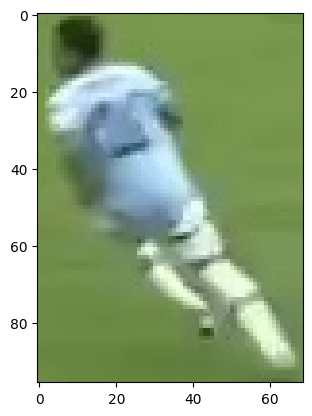

In [7]:
plt.imshow(image)
plt.show()

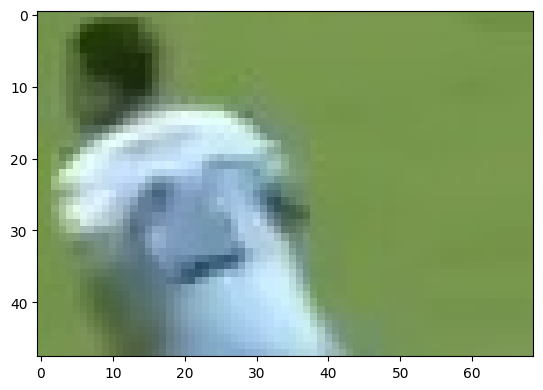

In [9]:
# using the upper half of the player jersey (shirt) to get the color of the player

top_half_image =image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

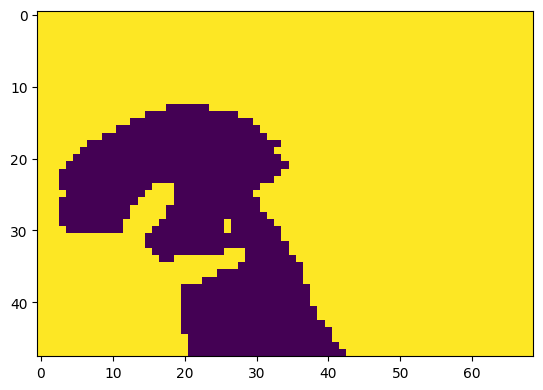

In [10]:
#using kmeans to cluster the colors

# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [11]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [12]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [13]:
kmeans.cluster_centers_[player_cluster]


array([168.57938719, 200.18523677, 215.35376045])